In [2]:
!pip install seaborn
!pip install wordcloud
!pip install pandas 
!pip install numpy

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

In [48]:
rs = 123

In [49]:
# Point to the datasets stored on the cloud
course_genre_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_genre.csv"
ratings_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/ratings.csv"

In [50]:
course_df = pd.read_csv(course_genre_url)
rating_df = pd.read_csv(ratings_url)

In [51]:
course_df.head()

,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,ML0201EN,robots are coming build iot apps with watson ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,ML0122EN,accelerating deep learning with gpu,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,GPXX0ZG0EN,consuming restful services using the reactive ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,RP0105EN,analyzing big data in r using apache spark,1,0,0,1,0,0,0,0,1,0,1,0,0,0
4,GPXX0Z2PEN,containerizing packaging and running a sprin...,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [52]:
course_df.shape

(307, 16)

In [53]:
course_df.dtypes

COURSE_ID          object
TITLE              object
Database            int64
Python              int64
CloudComputing      int64
DataAnalysis        int64
Containers          int64
MachineLearning     int64
ComputerVision      int64
DataScience         int64
BigData             int64
Chatbot             int64
R                   int64
BackendDev          int64
FrontendDev         int64
Blockchain          int64
dtype: object

In [54]:
rating_df

,user,item,rating
0,1889878,CC0101EN,3.0
1,1342067,CL0101EN,3.0
2,1990814,ML0120ENv3,3.0
3,380098,BD0211EN,3.0
4,779563,DS0101EN,3.0
...,...,...,...
233301,1540125,DS0101EN,3.0
233302,1250651,PY0101EN,3.0
233303,1003832,CB0105ENv1,3.0
233304,922065,BD0141EN,3.0


In [55]:
titles = " ".join(title for title in course_df["TITLE"].astype(str))

In [56]:
titles

'robots are coming  build iot apps with watson  swift  and node red accelerating deep learning with gpu consuming restful services using the reactive jax rs client analyzing big data in r using apache spark containerizing  packaging  and running a spring boot application cloud native security conference  data security data science bootcamp with r for university proffesors learn how to use docker containers for iterative development scorm test course create your first mongodb database testing microservices with the arquillian managed container cloud pak for integration essentials watson analytics for social media data science bootcamp with python for university professors  advance create a cryptocurrency trading algorithm in python data   ai essentials securing java microservices with eclipse microprofile json web token  microprofile jwt  enabling distributed tracing in microservices with zipkin sql access for hadoop ybrid cloud conference  ai pipelines lab dataops methodology data   ai

In [57]:
stopwords = set(STOPWORDS)

In [58]:
stopwords = set(STOPWORDS)
stopwords.update(["getting started", "using", "enabling", "template", "university", "end", "introduction", "basic"])

In [59]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white",width=800,height=400)

In [60]:
wordcloud.generate(titles)

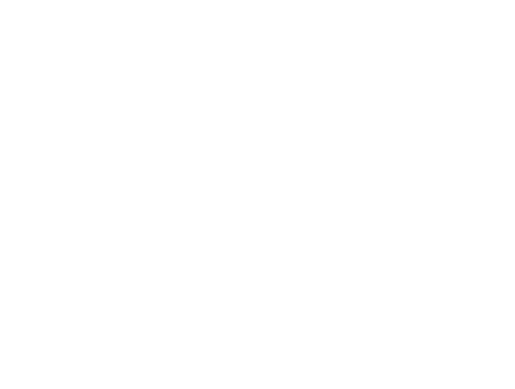

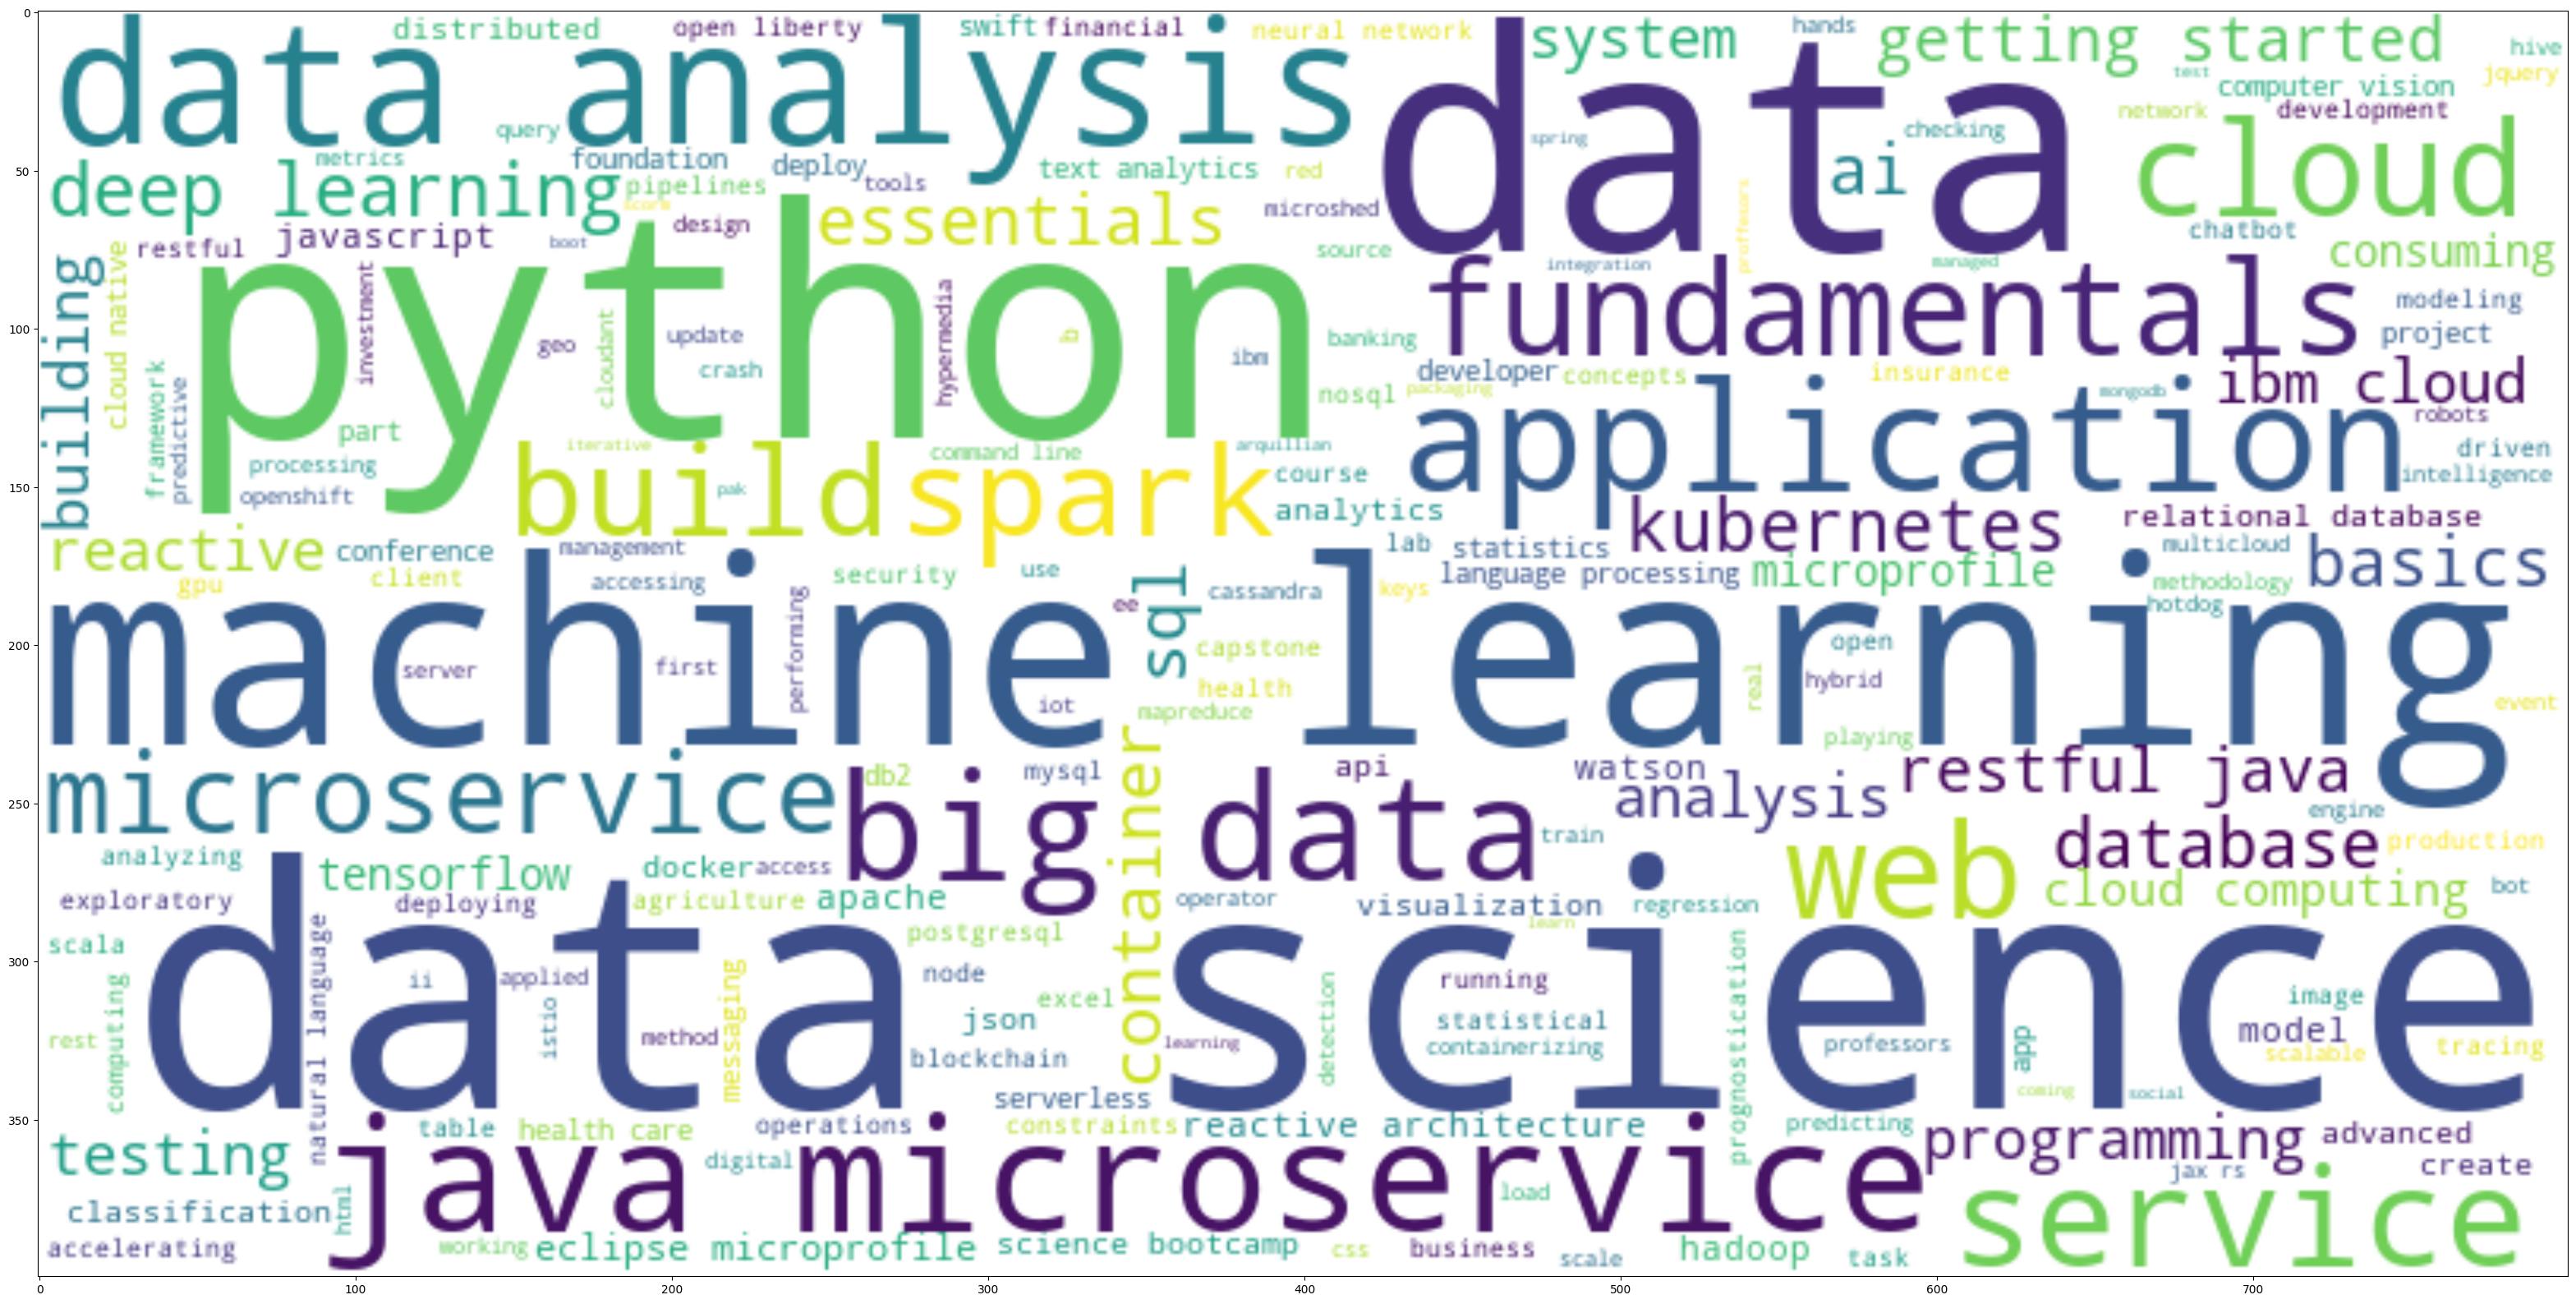

In [61]:
plt.axis("off")
plt.figure(figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [68]:
course_df[course_df['MachineLearning'] == 1]

,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
1,ML0122EN,accelerating deep learning with gpu,0,1,0,0,0,1,0,1,0,0,0,0,0,0
15,DAI101EN,data ai essentials,0,0,0,0,0,1,0,0,0,0,0,0,0,0
19,HCC105EN,ybrid cloud conference ai pipelines lab,0,0,0,0,0,1,0,0,0,0,0,0,0,0
21,DS0132EN,data ai jumpstart your journey,0,0,0,0,0,1,0,0,0,0,0,0,0,0
24,BENTEST4,ai for everyone master the basics,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,excourse61,convolutional neural networks in tensorflow,0,0,0,0,0,1,1,0,0,0,0,0,0,0
282,excourse69,machine learning with big data,0,0,0,0,0,1,0,0,1,0,0,0,0,0
290,excourse77,natural language processing with attention models,0,0,0,0,0,1,0,0,0,0,0,0,0,0
291,excourse78,natural language processing with sequence models,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [77]:
course_df[(course_df["MachineLearning"]==1) & (course_df["BigData"]==1)]

,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
46,GPXX0BUBEN,insurance risk assessment with montecarlo meth...,0,0,0,0,0,1,0,0,1,0,0,0,0,0
59,TA0106EN,text analytics at scale,0,0,0,0,0,1,0,1,1,0,0,0,0,0
184,BD0221EN,spark mllib,0,0,0,0,0,1,0,0,1,0,0,0,0,0
282,excourse69,machine learning with big data,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [62]:
genres = course_df.columns[2:]
genres

Index(['Database', 'Python', 'CloudComputing', 'DataAnalysis', 'Containers',
       'MachineLearning', 'ComputerVision', 'DataScience', 'BigData',
       'Chatbot', 'R', 'BackendDev', 'FrontendDev', 'Blockchain'],
      dtype='object')

In [84]:
genre_count = course_df[genres].sum()
genre_df = genre_count.reset_index()
genre_df.columns = ['Genre','Course Count']
genre_df

,Genre,Course Count
0,Database,60
1,Python,28
2,CloudComputing,37
3,DataAnalysis,56
4,Containers,17
5,MachineLearning,69
6,ComputerVision,10
7,DataScience,38
8,BigData,36
9,Chatbot,4


In [92]:
sorted_genre_df = genre_df.sort_values(by="Course Count",ascending=False)
sorted_genre_df

,Genre,Course Count
11,BackendDev,78
5,MachineLearning,69
0,Database,60
3,DataAnalysis,56
7,DataScience,38
2,CloudComputing,37
8,BigData,36
1,Python,28
12,FrontendDev,19
4,Containers,17


/var/folders/kw/f7wf1yfs1fj7x4f9h55pxvs00000gq/T/ipykernel_66105/3466005515.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genre', y = 'Course Count', data=sorted_genre_df, palette='viridis')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'BackendDev'),
  Text(1, 0, 'MachineLearning'),
  Text(2, 0, 'Database'),
  Text(3, 0, 'DataAnalysis'),
  Text(4, 0, 'DataScience'),
  Text(5, 0, 'CloudComputing'),
  Text(6, 0, 'BigData'),
  Text(7, 0, 'Python'),
  Text(8, 0, 'FrontendDev'),
  Text(9, 0, 'Containers'),
  Text(10, 0, 'R'),
  Text(11, 0, 'ComputerVision'),
  Text(12, 0, 'Chatbot'),
  Text(13, 0, 'Blockchain')])

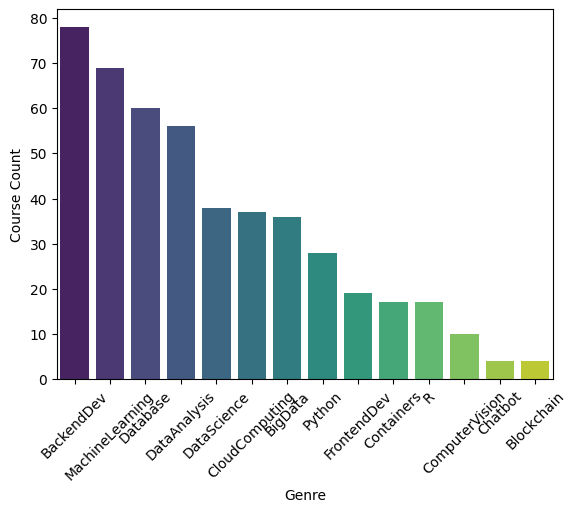

In [97]:
sns.barplot(x='Genre', y = 'Course Count', data=sorted_genre_df, palette='viridis')
plt.xticks(rotation=45)

In [98]:
rating_df.head()

,user,item,rating
0,1889878,CC0101EN,3.0
1,1342067,CL0101EN,3.0
2,1990814,ML0120ENv3,3.0
3,380098,BD0211EN,3.0
4,779563,DS0101EN,3.0


In [99]:
rating_df['rating'].unique()

array([3., 2.])

In [101]:
rating_df['rating'].describe()

count    233306.000000
mean          2.952954
std           0.211737
min           2.000000
25%           3.000000
50%           3.000000
75%           3.000000
max           3.000000
Name: rating, dtype: float64

In [102]:
rating_df.shape

(233306, 3)

In [110]:
user_df = rating_df.groupby('user').size().reset_index()
user_df.columns= ['User','Count']

In [112]:
user_df['Count'].describe()

count    33901.000000
mean         6.881980
std          5.823548
min          1.000000
25%          2.000000
50%          6.000000
75%          9.000000
max         61.000000
Name: Count, dtype: float64

<Axes: xlabel='Count', ylabel='Count'>

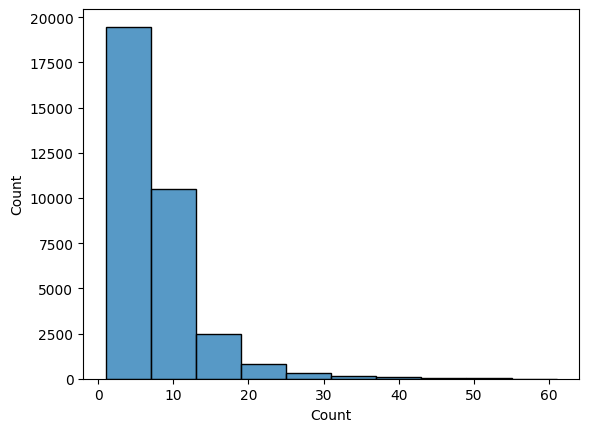

In [115]:
sns.histplot(user_df['Count'],bins = 10)

In [125]:
item_df = rating_df.groupby('item').size().reset_index()
item_df.columns = ["COURSE_ID","Count"]

In [126]:
top_20 = item_df.sort_values(by = "Count",ascending = False).head(20)
top_20

,COURSE_ID,Count
101,PY0101EN,14936
54,DS0101EN,14477
4,BD0101EN,13291
5,BD0111EN,10599
42,DA0101EN,8303
55,DS0103EN,7719
82,ML0101ENv3,7644
18,BD0211EN,7551
56,DS0105EN,7199
1,BC0101EN,6719


In [134]:
Top_20 = pd.merge(top_20, course_df[['COURSE_ID','TITLE']], on = "COURSE_ID", how='left')

In [130]:
total = rating_df.shape[0]

In [137]:
Top_20['percentage'] = Top_20["Count"]/total * 100

In [138]:
Top_20

,COURSE_ID,Count,percentage,TITLE
0,PY0101EN,14936,6.401893,python for data science
1,DS0101EN,14477,6.205155,introduction to data science
2,BD0101EN,13291,5.696810,big data 101
3,BD0111EN,10599,4.542961,hadoop 101
4,DA0101EN,8303,3.558845,data analysis with python
5,DS0103EN,7719,3.308530,data science methodology
6,ML0101ENv3,7644,3.276384,machine learning with python
7,BD0211EN,7551,3.236522,spark fundamentals i
8,DS0105EN,7199,3.085647,data science hands on with open source tools
9,BC0101EN,6719,2.879909,blockchain essentials
